In [0]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from astropy.visualization import hist

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
print(os.listdir('/content/drive/My Drive/Colab Notebooks/Divorce'))

['divorce.csv', 'divorce.xlsx', 'divorce.rar', '~$divorce.xlsx']


In [4]:
# Nossos dados foram obtidos através do portal UCI: Machine Learning Repository:
# https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set 
# Contêm 54 perguntas (features) para avaliar casamento.

# Foram respondidas por dois groupos:
#   1) Divorciados (coluna "Class" igual a 1)
#   2) Casados (coluna "Class" igual a 0)

# A ideia é buscar as seguintes informações:
#    1) Quais as perguntas chaves para determinar se um relacionamento está fadado ao fracasso
#    2) Prever, com estatisticas simples, se um casal é divorciado ou não
#    3) Responder o que representa as respostas 0,1,2,3 e 4.


# Como são os dados?
divorce = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Divorce/divorce.csv',sep=';')
divorce.head(3)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1


In [0]:
divorce_discussion = divorce[['Atr33','Atr34','Atr35','Atr36','Atr37','Atr39','Atr40','Atr46','Atr48','Class']]

In [39]:
divorce_discussion.describe()

,Atr33,Atr34,Atr35,Atr36,Atr37,Atr39,Atr40,Atr46,Atr48,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.805882,1.900000,1.670588,1.605882,2.088235,2.088235,1.870588,2.552941,2.741176,0.494118
std,1.785202,1.630515,1.842228,1.798412,1.716051,1.719496,1.796039,1.371786,1.137348,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,1.000000,1.000000,0.500000,0.000000,2.000000,2.000000,1.500000,3.000000,3.000000,0.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [45]:
mean_total = divorce_discussion.mean().mean()
std_total = divorce_discussion.mean().std()
print("Mean",mean_total)
print("Std",std_total)

Mean 1.8817647058823532
Std 0.6079851194075329


In [0]:
def separate_by_class(dataset):
  classes = np.unique(dataset['Class'])

  separated = []
  for cl in classes:
    separated.append(dataset[dataset['Class'] == cl].drop(['Class'], axis=1))

  return separated

separated = separate_by_class(divorce_discussion)

In [71]:
total_casados = len(separated[0])
total_casados

86

In [72]:
total_divorciados = len(separated[1])
total_divorciados

84

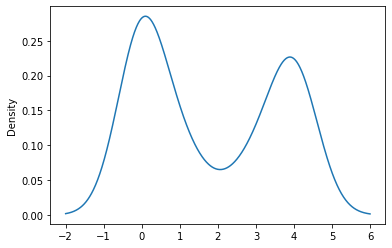

In [102]:
divorce_discussion.Atr33.plot.kde()

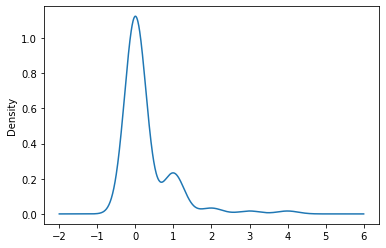

In [126]:
separated[0].Atr33.plot.kde()

In [115]:
separated[1].loc[separated[1].Atr33 < 3].Atr33

0     1
1     2
2     1
3     2
4     1
5     1
6     2
7     0
8     1
9     0
75    0
79    2
82    1
Name: Atr33, dtype: int64

In [0]:
total_casados = len(separated[0])
total_divorciados = len(separated[1])
total_divorciados_menor3 = len(separated[1].loc[separated[1].Atr33 < 3])
#xm_pl = separated[1].Atr33.mean()
xm_pl = separated[1].loc[separated[1].Atr33 < 3].Atr33.mean()
xsigma_pl = separated[1].Atr33.std()
#xsigma_pl = separated[0].Atr33.mean()
#mi_pl = divorce_discussion.Atr33.mean()
#sigma_pl = divorce_discussion.Atr33.std()
mi_pl = separated[1].Atr33.mean()
sigma_pl = separated[1].Atr33.std()

In [0]:
total_casados = len(separated[0])
total_divorciados = len(separated[1])
total_divorciados_menor3 = len(separated[0].loc[separated[0].Atr33 >= 2])
#xm_pl = separated[1].Atr33.mean()
xm_pl = separated[0].loc[separated[0].Atr33 >= 2].Atr33.mean()
xsigma_pl = separated[0].Atr33.std()
#xsigma_pl = separated[0].Atr33.mean()
#mi_pl = divorce_discussion.Atr33.mean()
#sigma_pl = divorce_discussion.Atr33.std()
mi_pl = separated[0].Atr33.mean()
sigma_pl = separated[0].Atr33.std()

In [124]:
print("media divorciado resposta < 3 feature33:",xm_pl)
#print("std divorciado feature33:",xsigma_pl)
print("media feature33 divorciado:",mi_pl)
print("std feature33 divorciado:",sigma_pl)
print("Total Casados:",total_casados)
print("Total divorciados com resposta < 3:",total_divorciados_menor3)

media divorciado resposta < 3 feature33: 2.75
media feature33 divorciado: 0.29069767441860467
std feature33 divorciado: 0.6836971993983271
Total Casados: 86
Total divorciados com resposta < 3: 4


In [0]:
import scipy.stats as st
import numpy as np

def calc_z0(xm, mi, sigma, n):
  return (xm - mi)/(sigma/np.sqrt(n))

def decision_normal(z0, alpha, unilateral=True, right=True):
  p = st.norm.cdf(z0)
  if unilateral:
    if right:
      reject = (p > (1.0 - alpha))
    else:
      reject = (p < alpha)
  else:
    reject = ((p < (alpha/2)) | (p > (1.0 - alpha/2)))

  return reject

In [125]:
# 7.
z0 = calc_z0(xm_pl, mi_pl, sigma_pl, total_divorciados_menor3)
print('z0 = ', z0)

z0 =  7.194127247400314


In [0]:
p_z0 = st.norm.cdf(z0)
print('p(z0) = ', p_z0)
alpha = 0.05

reject = decision_normal(z0, alpha, unilateral=False)

if(reject):
  print('H_0 rejeitada')
  print('O tamanho da sépala é diferente de 5.8')
else:
  print('H_0 não rejeitada')
  print('Não há evidência que o tamanho da sépala é diferente de 5.8')

In [0]:
zscore = [i-mean_total/std_total for i in divorce_discussion.drop(['Class'], axis=1).mean()]

In [59]:
zscore

[-1.2892011381088817,
 -1.1950834910500583,
 -1.4244952557559405,
 -1.4892011381088817,
 -1.006848196932411,
 -1.006848196932411,
 -1.2244952557559405,
 -0.5421423145794702,
 -0.3539070204618229]

In [0]:
# Para a feature 33 cuja a média da resposta é 1.80 e o desvio padrão de 1.78. Para um resposta com valor 3, qual é a probabilidade de não ser casado?

In [0]:
#@title Para a feature 33 cuja a média da resposta é 1.80 e o desvio padrão de 1.78. Para um resposta com valor 3, qual é a probabilidade de não ser casado?


In [0]:
def zscore(valor,media,desvio):
  return valor-media/desvio

In [0]:
output = zscore(3,1.80,1.78)

In [63]:
output

1.9887640449438202

,Atr33,Atr34,Atr35,Atr36,Atr37,Atr39,Atr40,Atr46,Atr48,Class
count,84.000000,84.00000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0
mean,3.357143,3.27381,3.273810,3.214286,3.583333,3.642857,3.571429,3.166667,3.452381,1.0
std,1.093715,1.02206,1.264446,1.172696,0.824451,0.754790,0.732806,1.095812,0.718176,0.0
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,3.000000,3.00000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,1.0
50%,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0
75%,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0
max,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0


In [22]:
divorce_discussion[divorce_discussion.Class == 0].describe()

,Atr33,Atr34,Atr35,Atr36,Atr37,Atr39,Atr40,Atr46,Atr48,Class
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,0.290698,0.558140,0.104651,0.034884,0.627907,0.569767,0.209302,1.953488,2.046512,0.0
std,0.683697,0.760876,0.406682,0.184561,0.908088,0.775215,0.487883,1.353922,1.039309,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,3.000000,0.0
max,4.000000,4.000000,3.000000,1.000000,4.000000,4.000000,2.000000,4.000000,4.000000,0.0


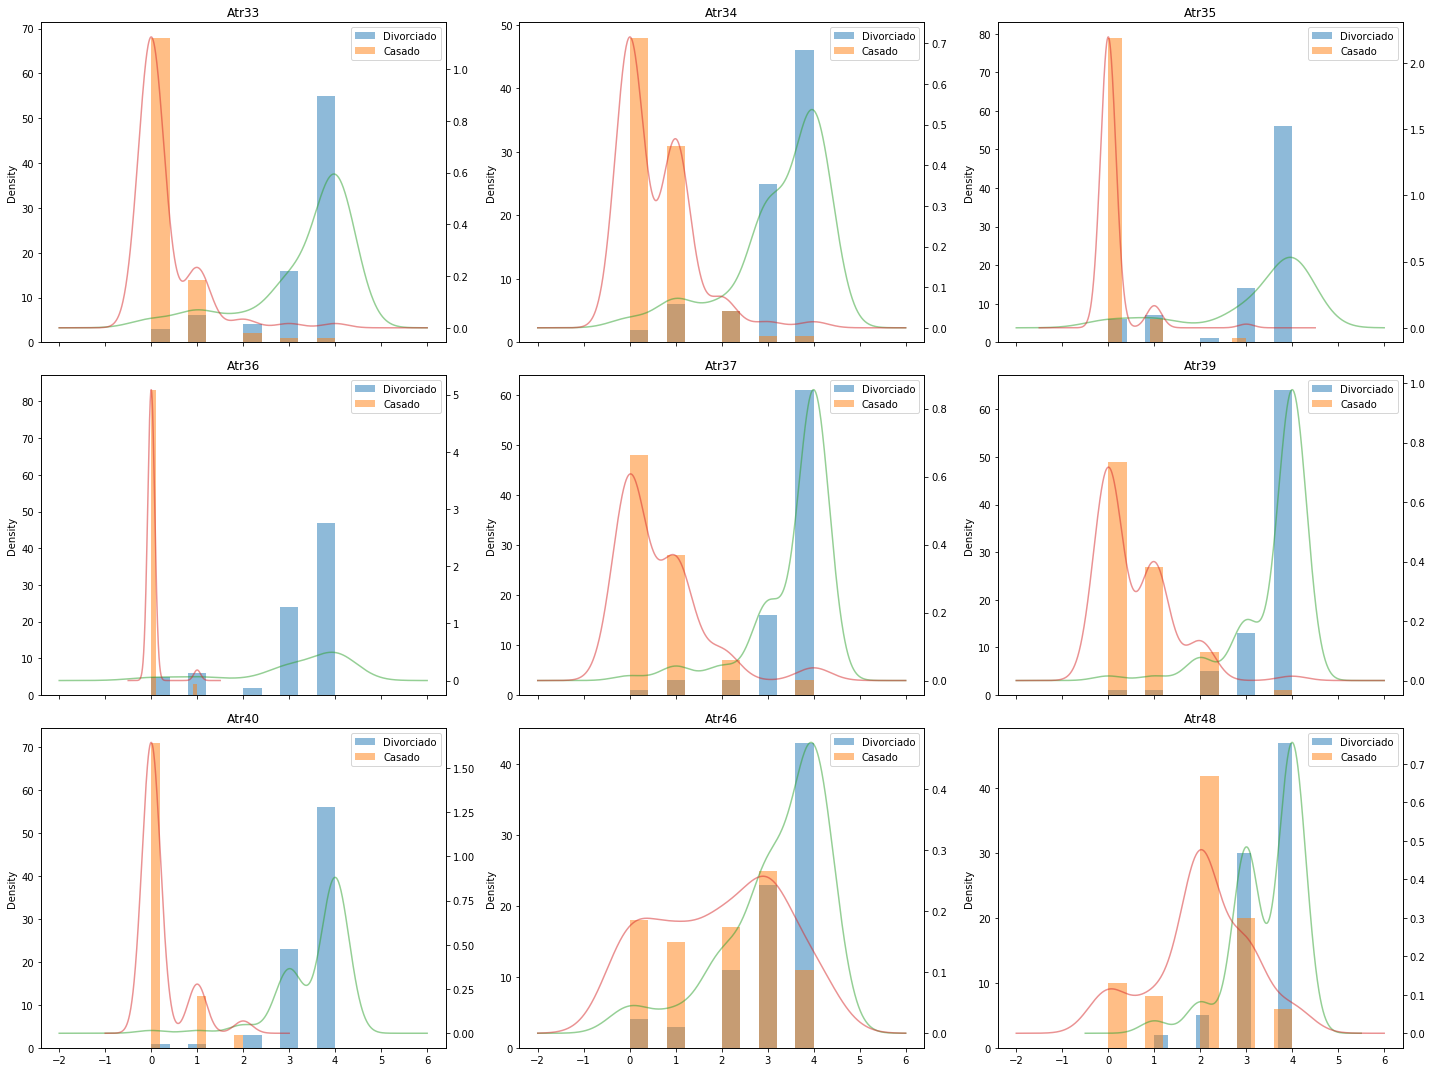

In [32]:
fig, axs = plt.subplots(3, 3,figsize=(20,15))
discu = [33,34,35,36,37,39,40,46,48]
count = 0
for r in range(3):
  for c in range(3):
    t = "Atr" + str(discu[count])
    x = separated[1][t]
    y = separated[0][t]
    axs[r, c].hist(x,alpha=0.5,label='Divorciado')
    axs[r, c].hist(y,alpha=0.5,label='Casado')
    x.plot.kde(ax=axs[r, c], secondary_y=True, title=t,alpha=0.5,label='Divorciado')
    y.plot.kde(ax=axs[r, c], secondary_y=True, title=t,alpha=0.5,label='Casado')
    axs[r, c].legend(loc='upper right')
    fig.tight_layout()
    count+=1


In [35]:
stats.zscore(divorce_discussion['Atr33'])

array([-0.45275714,  0.10905829, -0.45275714,  0.10905829, -0.45275714,
       -0.45275714,  0.10905829, -1.01457256, -0.45275714, -1.01457256,
        1.23268914,  1.23268914,  1.23268914,  1.23268914,  1.23268914,
        1.23268914,  1.23268914,  1.23268914,  1.23268914,  1.23268914,
        1.23268914,  1.23268914,  1.23268914,  1.23268914,  1.23268914,
        1.23268914,  1.23268914,  1.23268914,  1.23268914,  1.23268914,
        1.23268914,  1.23268914,  1.23268914,  1.23268914,  1.23268914,
        1.23268914,  1.23268914,  1.23268914,  1.23268914,  1.23268914,
        1.23268914,  1.23268914,  0.67087371,  1.23268914,  1.23268914,
        1.23268914,  1.23268914,  1.23268914,  1.23268914,  1.23268914,
        1.23268914,  1.23268914,  1.23268914,  0.67087371,  1.23268914,
        0.67087371,  0.67087371,  0.67087371,  1.23268914,  1.23268914,
        1.23268914,  1.23268914,  1.23268914,  1.23268914,  0.67087371,
        1.23268914,  1.23268914,  1.23268914,  1.23268914,  1.23

In [33]:
stats.zscore(divorce_discussion)

array([[-0.45275714,  0.06151149, -0.90950926, ..., -0.4042721 ,
         0.22823984,  1.01183473],
       [ 0.10905829,  0.6766264 , -0.90950926, ..., -0.4042721 ,
         0.22823984,  1.01183473],
       [-0.45275714, -0.55360342, -0.3650847 , ...,  0.32685829,
         0.22823984,  1.01183473],
       ...,
       [-1.01457256, -0.55360342, -0.90950926, ...,  0.32685829,
        -0.6535959 , -0.98830369],
       [-1.01457256, -0.55360342, -0.90950926, ...,  0.32685829,
        -0.6535959 , -0.98830369],
       [-1.01457256, -1.16871832, -0.90950926, ...,  0.32685829,
         1.11007558, -0.98830369]])

In [0]:
x = separated[1]['Atr1']
y = separated[0]['Atr1']

In [0]:
x= divorce.loc[divorce.Class == 1]['Atr1']
y= divorce.loc[divorce.Class == 0]['Atr1']

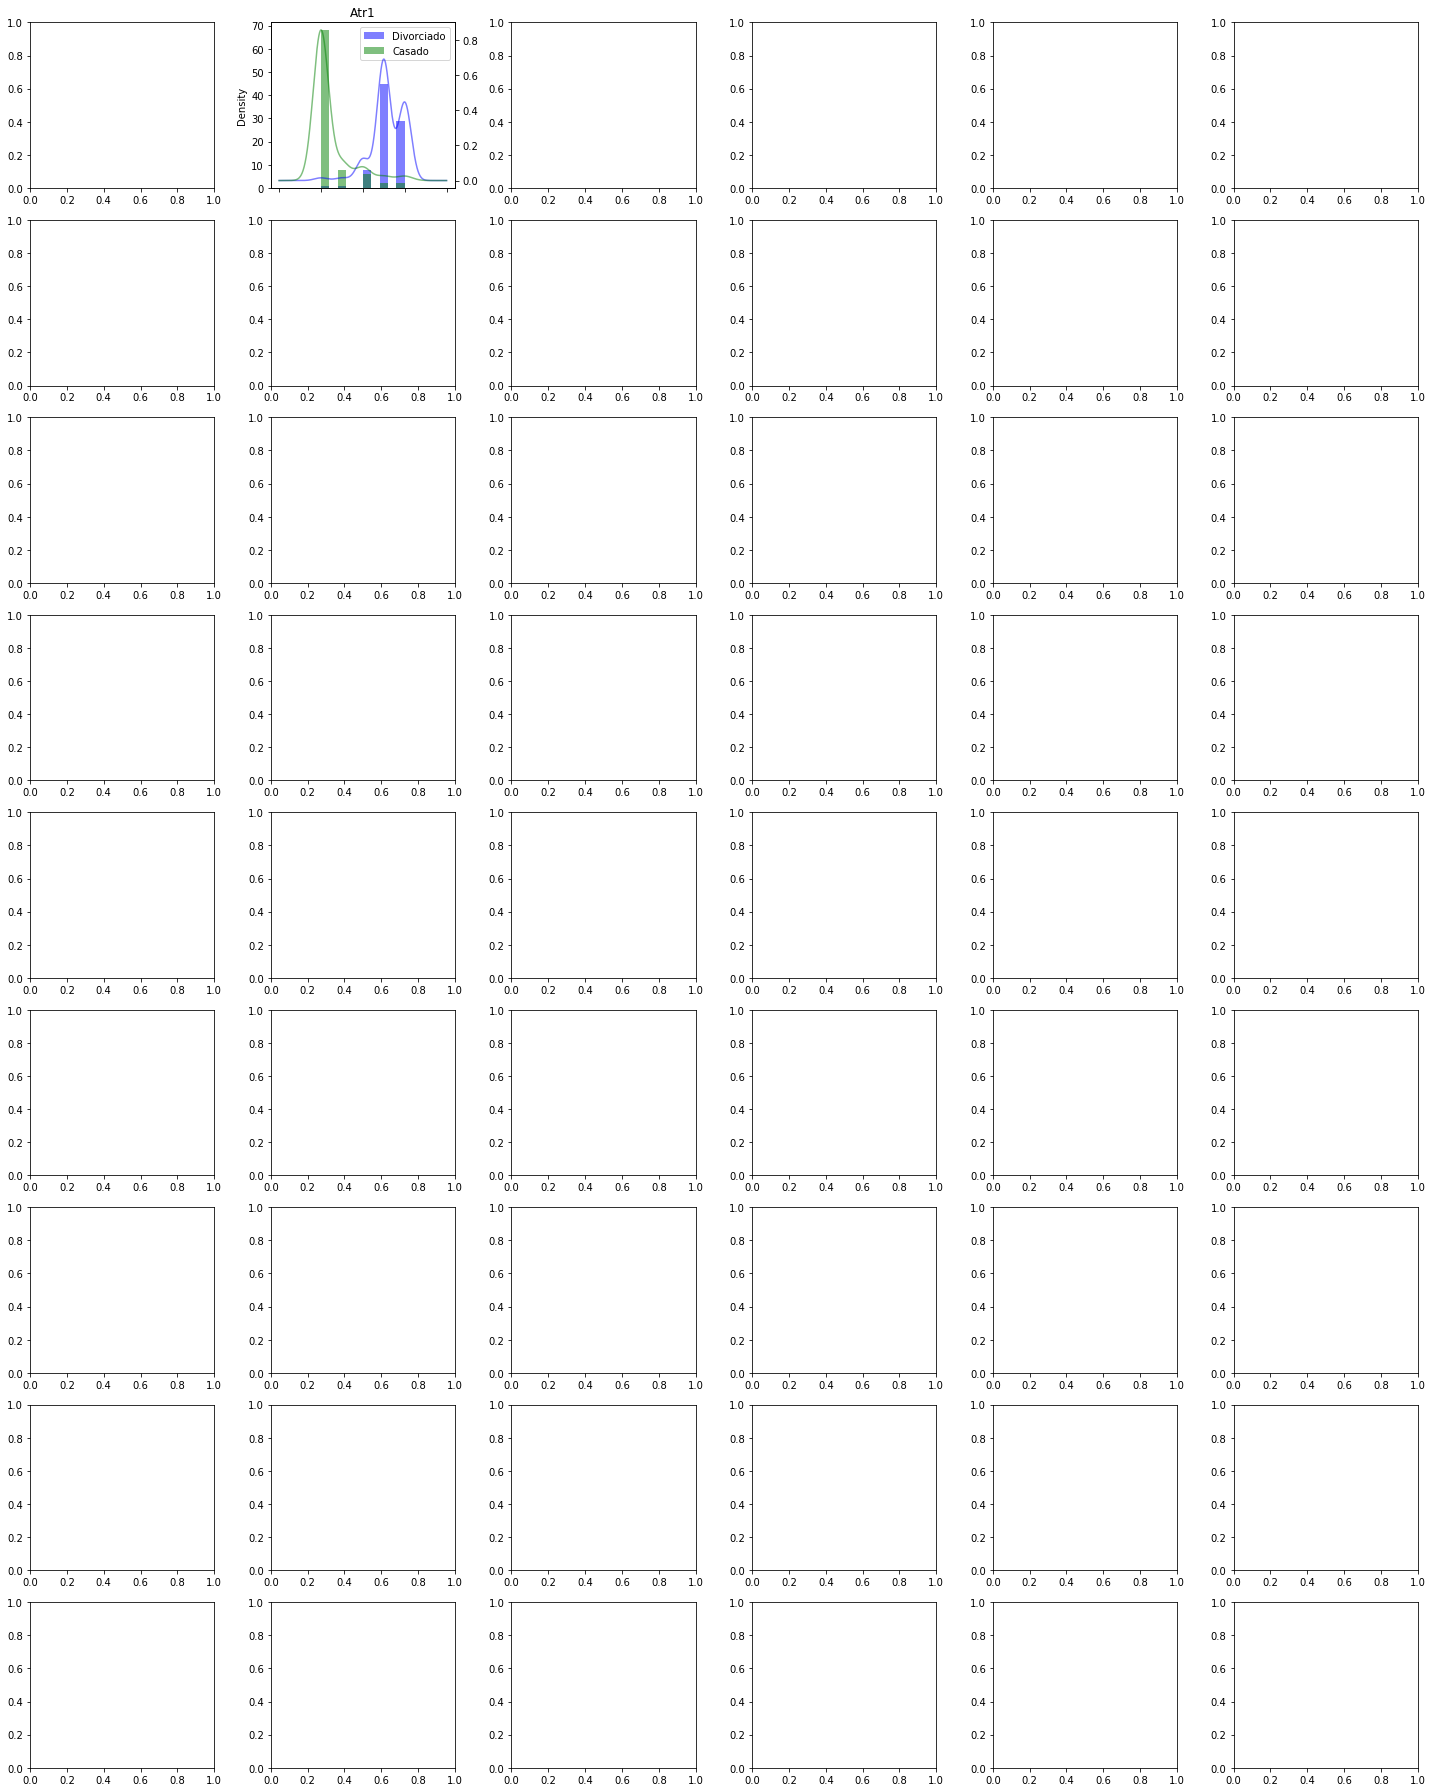

In [0]:
fig, axs = plt.subplots(9, 6)
fig.set_size_inches(20,h=25)
axs[0, 1].hist(x,alpha=0.5,label='Divorciado', color='b')
axs[0, 1].hist(y,alpha=0.5,label='Casado', color='g')
x.plot.kde(ax=axs[0, 1], secondary_y=True, title='Atr1',alpha=0.5,label='Divorciado', color='b')
y.plot.kde(ax=axs[0, 1], secondary_y=True, title='Atr1',alpha=0.5,label='Casado', color='g')
axs[0, 1].legend(loc='upper right')
fig.tight_layout()

(array([68.,  0.,  8.,  0.,  0.,  6.,  0.,  2.,  0.,  2.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

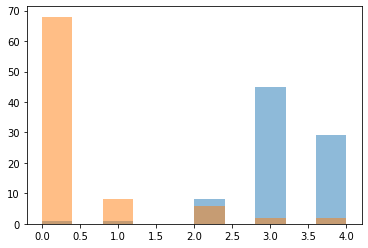

In [0]:
plt.hist(x,alpha=0.5,label='Divorciado')
plt.hist(y,alpha=0.5,label='Casado')

AttributeError: ignored

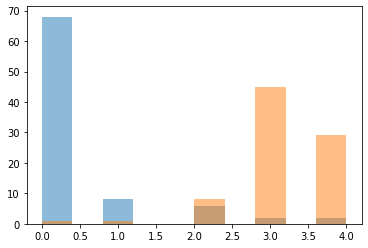

In [0]:
plt.hist(separated[0]['Atr1'],alpha=0.5,label='Casado')
plt.hist(separated[1]['Atr1'], alpha=0.5,label='Divorciado')
plt.kde(separated[0]['Atr1'],alpha=0.5,label='Casado')
plt.kde(separated[1]['Atr1'], alpha=0.5,label='Divorciado')
plt.legend(loc='upper right')
plt.show()

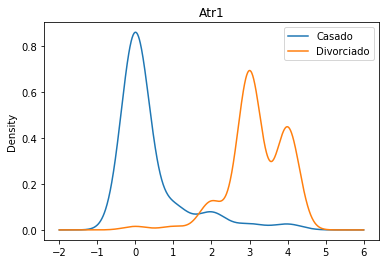

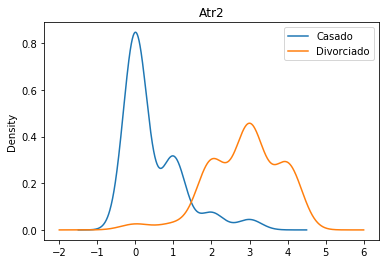

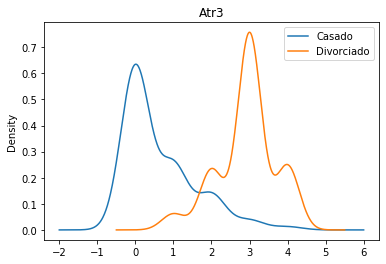

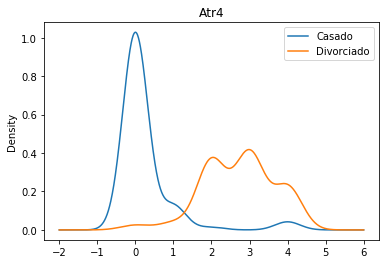

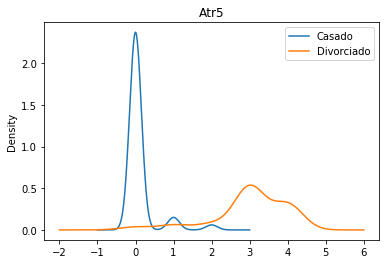

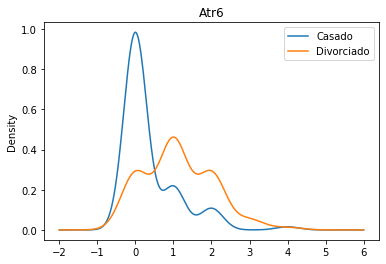

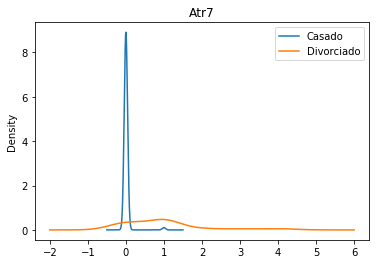

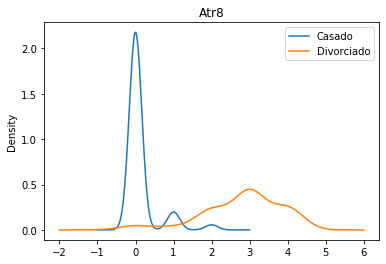

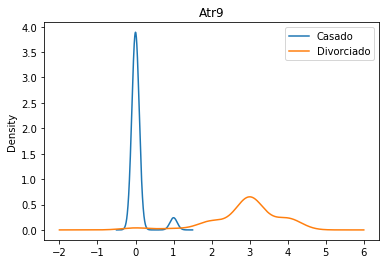

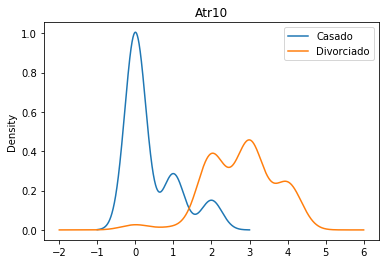

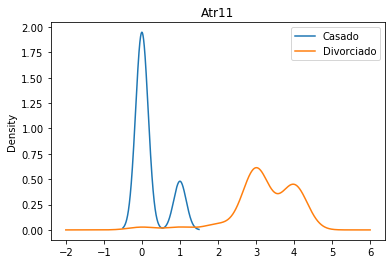

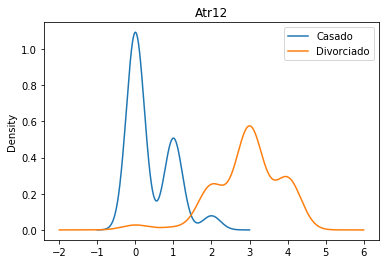

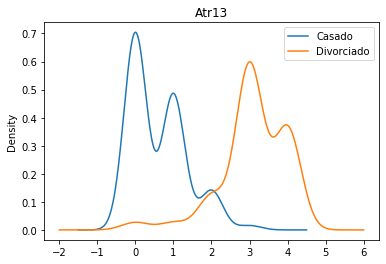

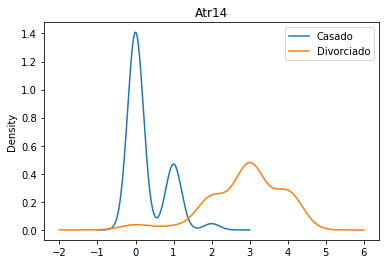

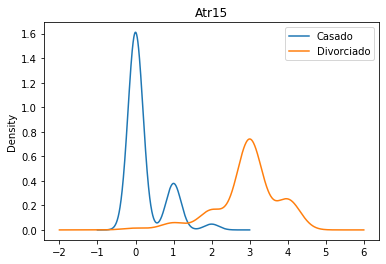

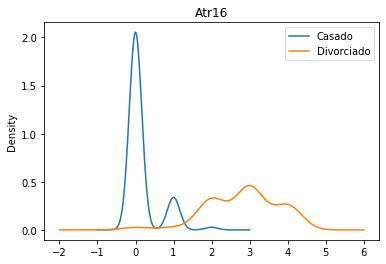

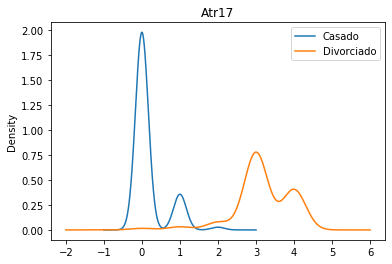

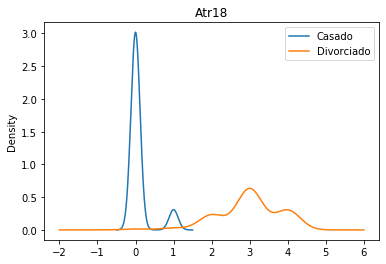

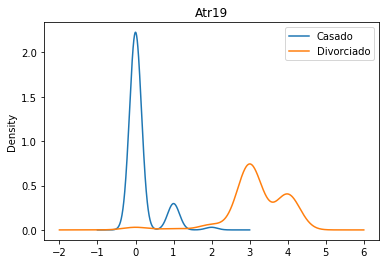

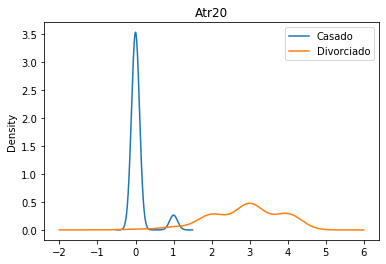

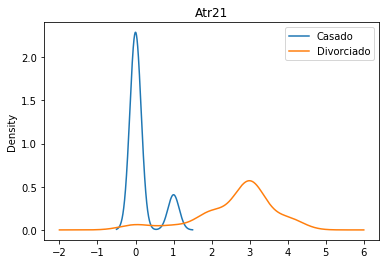

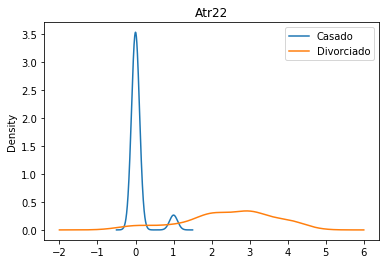

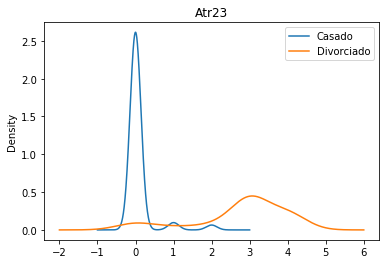

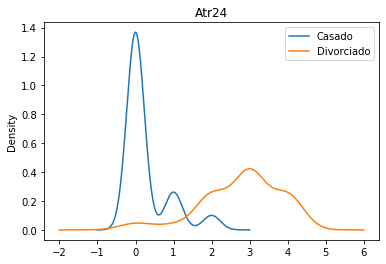

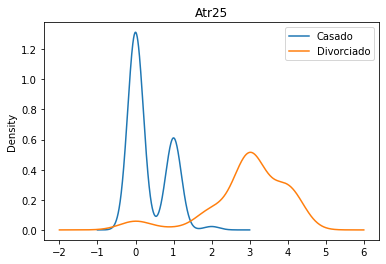

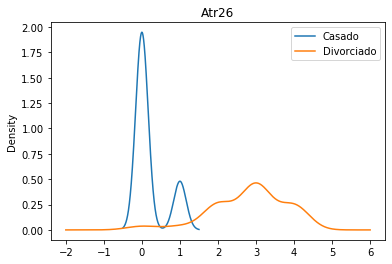

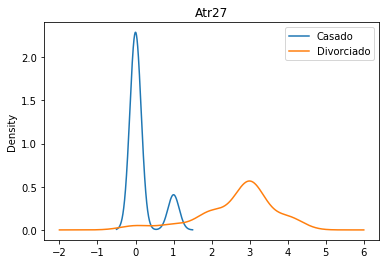

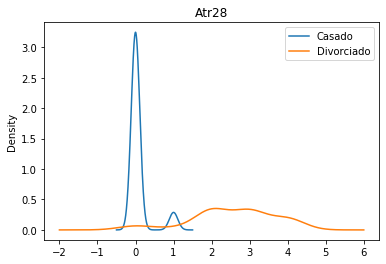

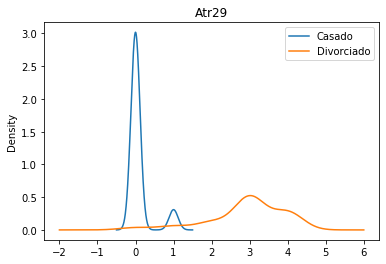

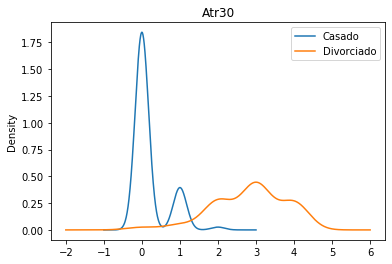

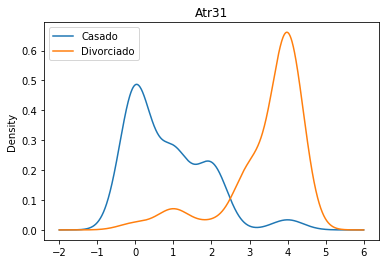

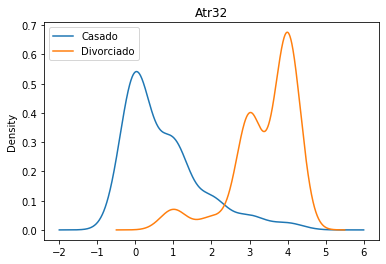

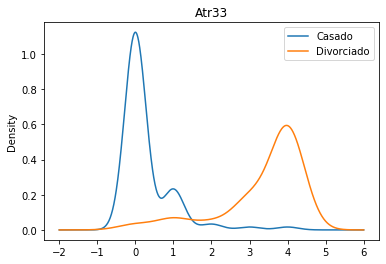

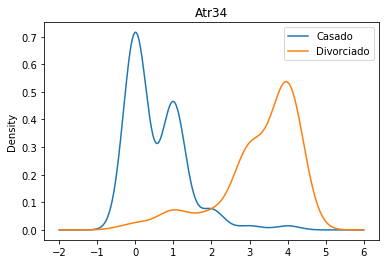

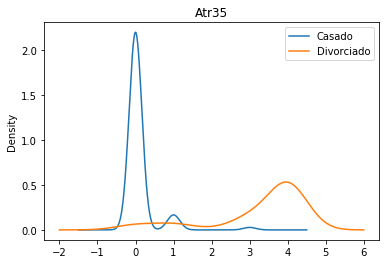

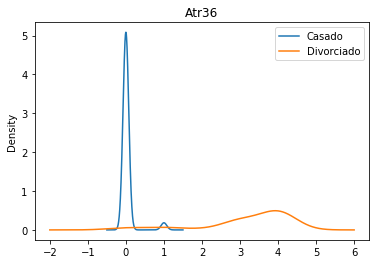

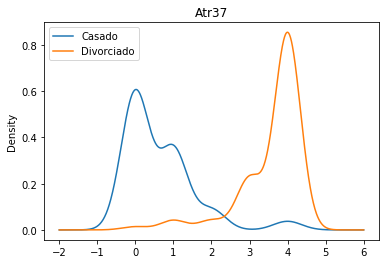

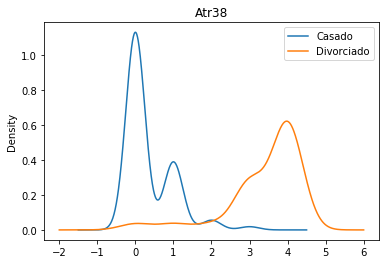

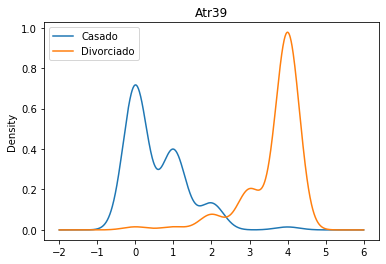

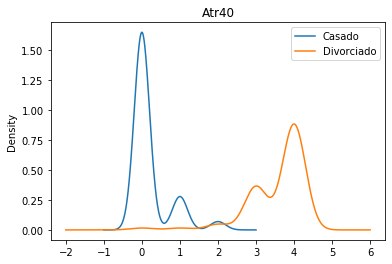

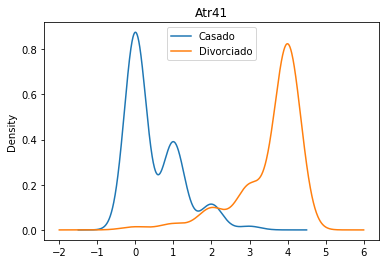

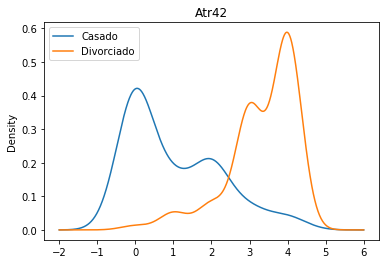

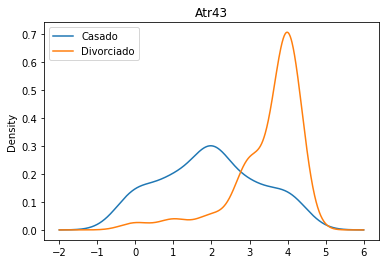

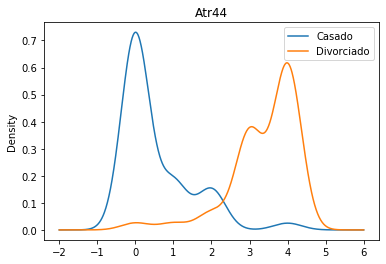

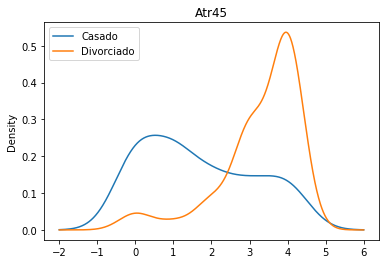

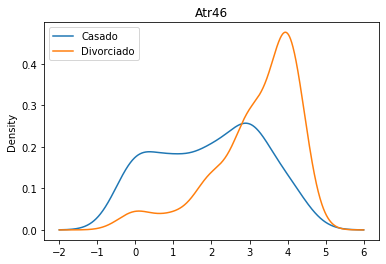

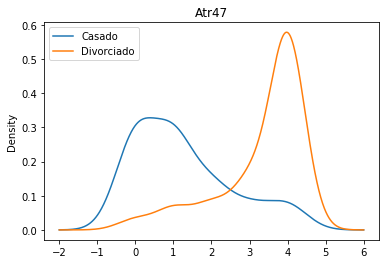

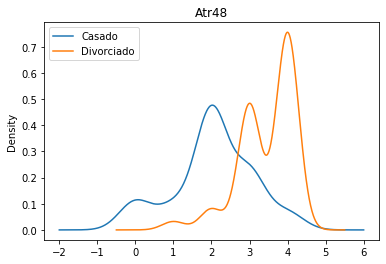

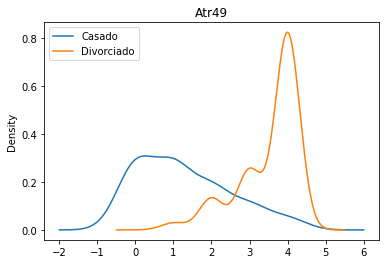

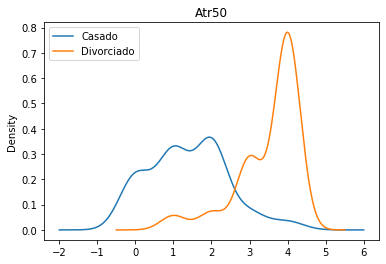

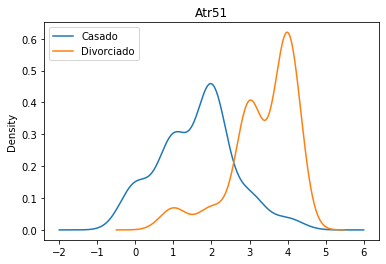

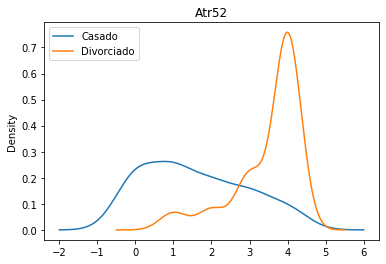

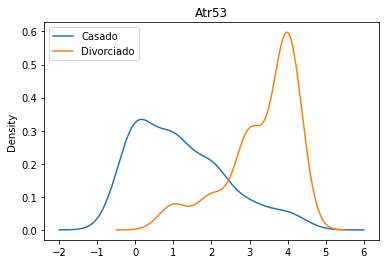

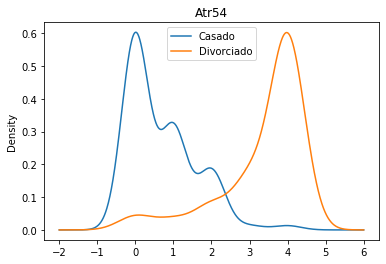

In [0]:
# Como está representado o gráfico KDE?
for atr in separated[0].columns:
  pd.DataFrame({'Casado': separated[0][atr], 'Divorciado': separated[1][atr]}).plot.kde(title=atr)

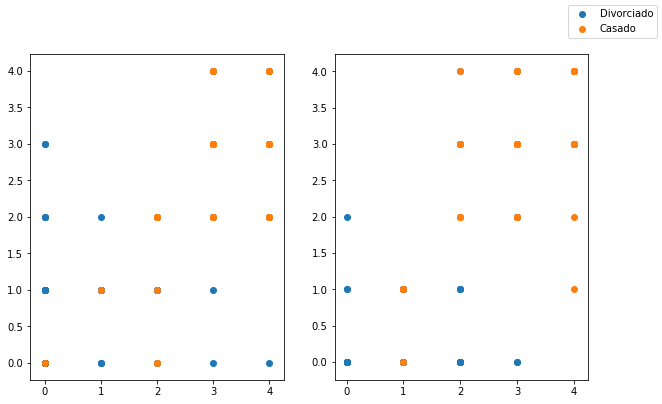

In [0]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,h=6)
for s in separated:
  ax[0].scatter(s['Atr1'], s['Atr2'])
  ax[1].scatter(s['Atr3'], s['Atr4'])
fig.legend(['Divorciado', 'Casado'])

In [0]:
def summarize_dataset(dataset, eliminate_last=True):
  if eliminate_last:
    columns = dataset.columns[:-1]
  else:
    columns = dataset.columns
  summaries = [(np.mean(dataset[column]), np.std(dataset[column]), len(dataset[column])) for column in dataset.columns]
  del(summaries[-1])
  return summaries

summaries = summarize_dataset(iris)

print(summaries)

In [0]:
def summarize_by_class(dataset):
  separated = separate_by_class(dataset)
  summaries = dict()
  for s in separated:
    class_value = np.array(s['Class'])
    rows = s[s.columns]
    summaries[class_value[0]] = summarize_dataset(rows, eliminate_last=False)
  return summaries

summaries_by_class = summarize_by_class(iris)
print(summaries_by_class)